# FIFA 19 Player Data Analysis and Visualization EDA
FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. Announced on 6 June 2018 for its E3 2018 press conference, it was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.It is the 26th installment in the FIFA series. As with FIFA 18, Cristiano Ronaldo initially as the cover athlete of the regular edition: however, following his unanticipated transfer from Spanish club Real Madrid to Italian side Juventus, new cover art was released, featuring Neymar, Kevin De Bruyne and Paulo Dybala.

The game features the UEFA club competitions for the first time, including the UEFA Champions League and UEFA Europa League.Martin Tyler and Alan Smith return as regular commentators, while the new commentary team of Derek Rae and Lee Dixon feature in the UEFA competitions mode.Composer Hans Zimmer and rapper Vince Staples recorded a new remix of the UEFA Champions League anthem specifically for the game. The character Alex Hunter, who first appeared in FIFA 17 returns for the third and final installment of "The Journey", entitled, "The Journey: Champions".In June 2019, a free update added the FIFA Women's World Cup as a separate game mode.

This is the last game in the FIFA series to be available on a seventh-generation console, and the last known game to be available for the PlayStation 3 worldwide.

### Used Libraries
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Plotly
6. Missingno

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Content:
1. Missingo - Missing Data
2. Data Cleaning
3. Seaborn - Heatmap
4. Seaborn - Bar Plot
5. Plotly - Bar Plot
6. Word Cloud
7. Plotly - Donut Chart
8. Plotly - Box Plot
9. Plotly - 3D Scatter Plot

### Reading Data

In [24]:
df=pd.read_csv("data.csv")

In [25]:
df.sample(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
10318,10318,238686,P. Sohm,26,https://cdn.sofifa.org/players/4/19/238686.png,Germany,https://cdn.sofifa.org/flags/21.png,65,66,Hallescher FC,...,68.0,24.0,23.0,25.0,13.0,11.0,10.0,8.0,7.0,€991K
12460,12460,234087,C. Styles,18,https://cdn.sofifa.org/players/4/19/234087.png,England,https://cdn.sofifa.org/flags/14.png,63,78,Bury,...,65.0,55.0,42.0,26.0,10.0,15.0,12.0,5.0,7.0,NaN
6561,6561,177906,D. Soddimo,30,https://cdn.sofifa.org/players/4/19/177906.png,Italy,https://cdn.sofifa.org/flags/27.png,69,69,Frosinone,...,70.0,45.0,40.0,33.0,8.0,8.0,11.0,9.0,6.0,€1.8M
8640,8640,221924,K. Fisker,30,https://cdn.sofifa.org/players/4/19/221924.png,Denmark,https://cdn.sofifa.org/flags/13.png,67,67,Brøndby IF,...,64.0,60.0,45.0,34.0,10.0,14.0,9.0,9.0,7.0,€910K
14445,14445,208816,M. Rose,23,https://cdn.sofifa.org/players/4/19/208816.png,England,https://cdn.sofifa.org/flags/14.png,61,66,Grimsby Town,...,58.0,55.0,58.0,57.0,16.0,7.0,8.0,12.0,12.0,€593K


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [27]:
df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

# Missingno - Missing Data

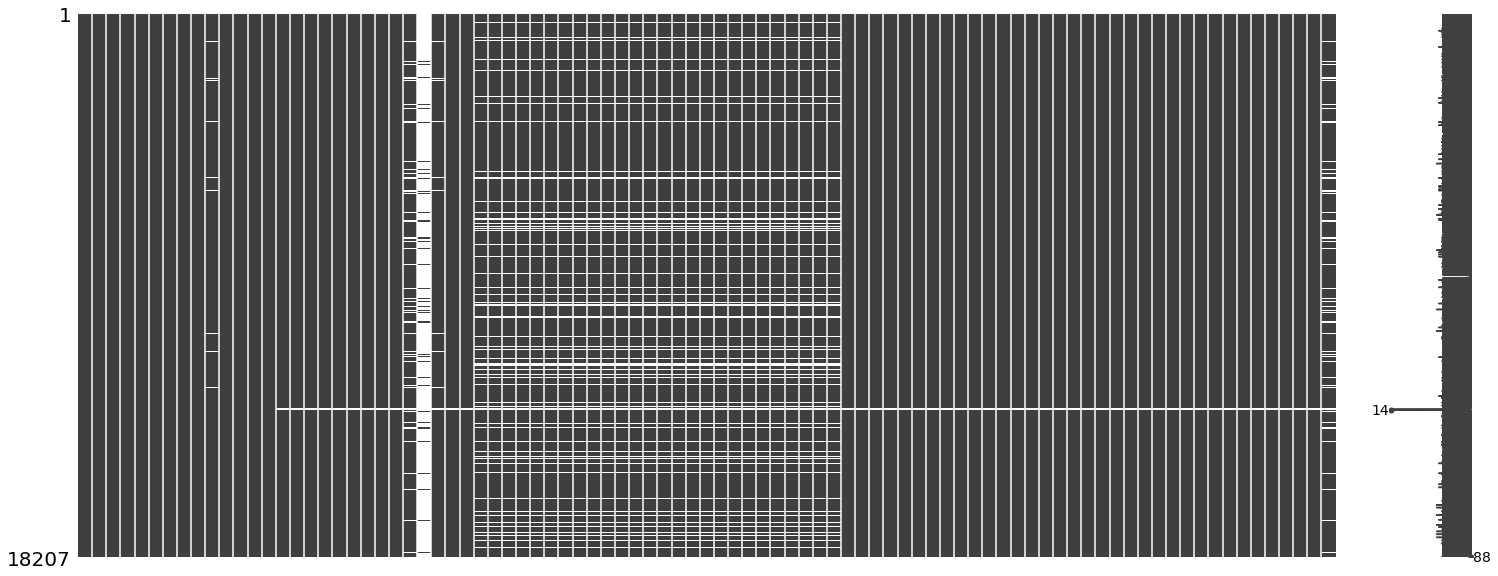

In [28]:
import missingno as msno
msno.matrix(df)
plt.show()

# Data Cleaning
### Removed unnecessary

In [29]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [30]:
df.drop(columns=['Unnamed: 0','Photo','Flag','Club Logo'],inplace=True)

# Seaborn - Heatmap
### Relationship between columns
* 01 --> Direct proportion
* 00 --> No relationship
* -1 --> İnverse proportion

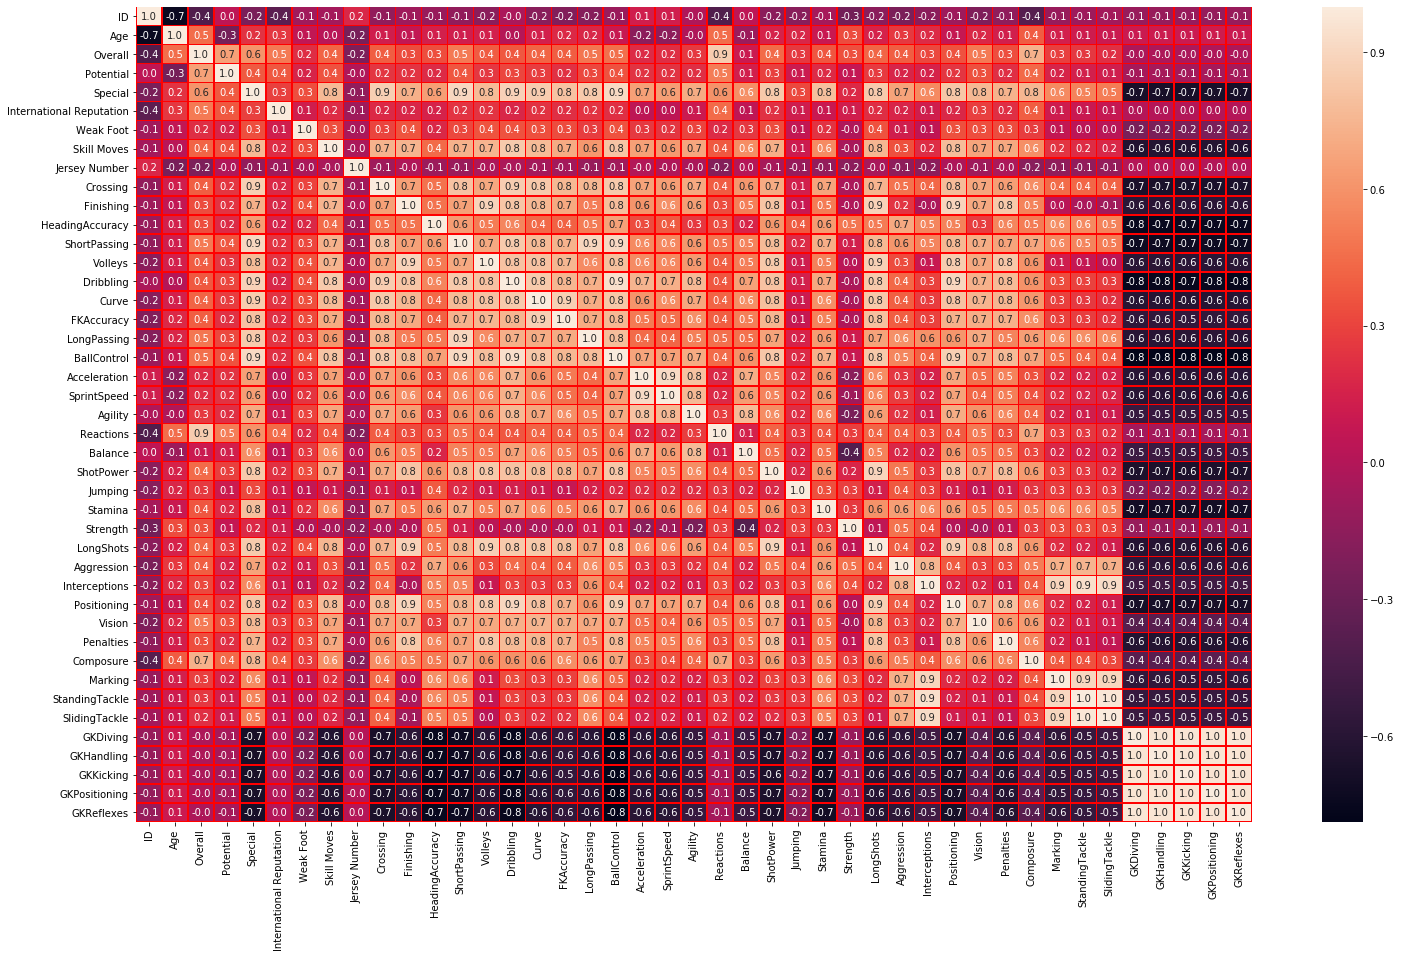

In [31]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Seaborn - Bar Plot

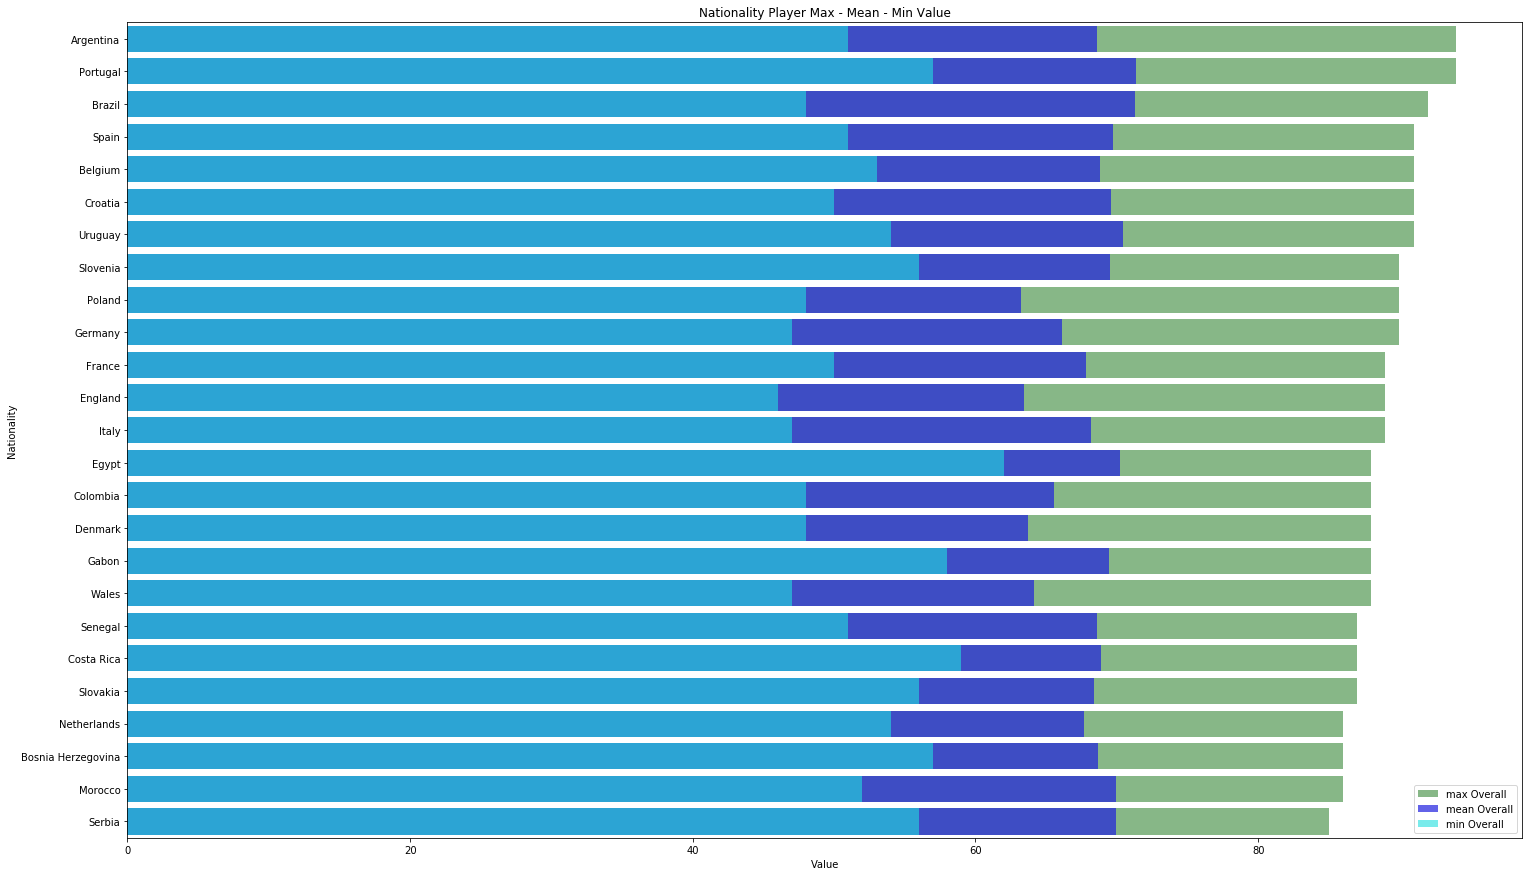

In [32]:
nationalityDf = pd.DataFrame(columns = ['Nationality'])
nationalityDf["Nationality"]=[each for each in df.Nationality.unique()]
nationalityDf["maxOverall"]=[df.Overall[df.Nationality==each].max() for each in nationalityDf.Nationality]
nationalityDf["meanOverall"]=[df.Overall[df.Nationality==each].mean() for each in nationalityDf.Nationality]
nationalityDf["minOverall"]=[df.Overall[df.Nationality==each].min() for each in nationalityDf.Nationality]
nationalityDf.sort_values(by=['maxOverall','meanOverall','minOverall'],ascending=False)
nationalityDf=nationalityDf.head(25)

# visualization
f,ax = plt.subplots(figsize = (25,15))
sns.barplot(x=nationalityDf.maxOverall,y=nationalityDf.Nationality,color='green',alpha = 0.5,label='max Overall' )
sns.barplot(x=nationalityDf.meanOverall,y=nationalityDf.Nationality,color='blue',alpha = 0.7,label='mean Overall')
sns.barplot(x=nationalityDf.minOverall,y=nationalityDf.Nationality,color='cyan',alpha = 0.6,label='min Overall')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Value', ylabel='Nationality',title = "Nationality Player Max - Mean - Min Value")
plt.show()

# Plotly - Bar Plot ( Interactive )
### It takes RGB "0-255" for all values for opacity "0-1"

In [33]:
ClubDf = pd.DataFrame(columns = ['Club'])
ClubDf["Club"]=[each for each in df.Club.unique()]
ClubDf["maxOverall"]=[df.Overall[df.Club==each].max() for each in ClubDf.Club]
ClubDf["meanOverall"]=[df.Overall[df.Club==each].mean() for each in ClubDf.Club]
ClubDf["minOverall"]=[df.Overall[df.Club==each].min() for each in ClubDf.Club]
ClubDf.sort_values(by=['maxOverall','meanOverall','minOverall'],ascending=False)
ClubDf=ClubDf.head(25)
# create trace1 
trace1 = go.Bar(
                x = ClubDf.Club,
                y = ClubDf.maxOverall,
                name = "Max Overall Value",
                marker = dict(color = 'rgba(55, 114, 55, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = ClubDf.Club)
# create trace2 
trace2 = go.Bar(
                x = ClubDf.Club,
                y = ClubDf.meanOverall,
                name = "Mean Overall Value",
                marker = dict(color = 'rgba(235, 155, 12, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = ClubDf.Club)
# create trace3 
trace3 = go.Bar(
                x = ClubDf.Club,
                y = ClubDf.minOverall,
                name = "Min Overall Value",
                marker = dict(color = 'rgba(235, 155, 162, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = ClubDf.Club)
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Word Cloud
### Nationality Text Size = Nationality Player Count

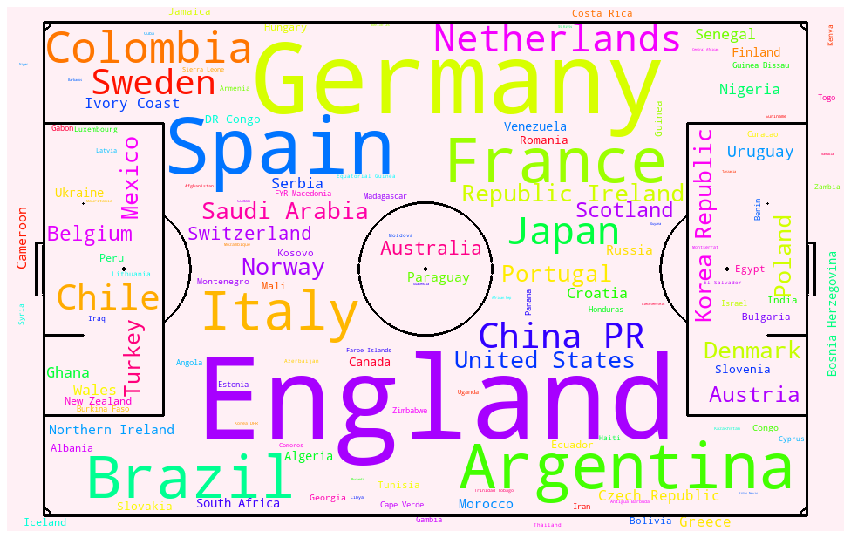

In [35]:
wave_mask= np.array(Image.open("soccer.png"))
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(    mask=wave_mask,
                          background_color="lavenderblush",
                          colormap="hsv",
                          contour_width=2,
                          contour_color="black",
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# Plotly - Donut Chart ( Interactive )
### Effect of preferred foot on position
* GK (Goalkeeper)
* RB (Right Back)
* RWB (Right Wing Back)
* LB (Lef Back)
* LWB (Lef Wing Back)
* CB (Center Back)
* RCB (Right Center Back)
* LCB (Left Center Back)
* CM (Center Midfielder)
* RCM (Right Center Midfielder)
* LCM (Left Center Midfielder)
* CDM (Center Defensive Midfielder)
* RCDM (Right Center Defensive Midfielder)
* LCDM (Left Center Defensive Midfielder
* CAM (Center Attacking Midfielder)
* RM (Right Midfielder)
* RWM (Right Wing Midfielder)
* LM (Left Midfielder)
* LWM (Left Wing Midfielder)
* ST (Striker)
* CF (Center Forward)
* RF (Right Forward)
* LF (Left Forward)
* SF (Secret Forward)

In [36]:
LeftLabels = df[df["Preferred Foot"]=="Left"].Position.value_counts().head(10).index
LeftValues = df[df["Preferred Foot"]=="Left"].Position.value_counts().head(10).values
RightLabels = df[df["Preferred Foot"]=="Right"].Position.value_counts().head(10).index
RightValues = df[df["Preferred Foot"]=="Right"].Position.value_counts().head(10).values

from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=LeftLabels, values=LeftValues, name="Left Foot Preferred"),
              1, 1)
fig.add_trace(go.Pie(labels=RightLabels, values=RightValues, name="Right Foot Preferred"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='LEFT', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='RİGHT', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

# Plotly - Box Plot ( Interactive )
### Barcelona vs Real Madrid (min,q1,median,q3,max value)

In [37]:
team1 = df[df.Club=="FC Barcelona"].Overall
team2 = df[df.Club=="Real Madrid"].Overall

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=team1, name='FC Barcelona'))
fig.add_trace(go.Box(x=team2, name='Real Madrid'))

fig.show()

# Plotly - 3D Scatter Plot ( Interactive )
* X = Crossing
* Y = Finishing
* Z = Short Passing

In [38]:
GalatasarayTeam = df[df.Club == "Galatasaray SK"].iloc[:,[50,51,53]]
FenerbahceTeam = df[df.Club == "Fenerbahçe SK"].iloc[:,[50,51,53]]

# trace1 =  Galatasarayy SK
trace1 = go.Scatter3d(
    x=GalatasarayTeam.Crossing,
    y=GalatasarayTeam.Finishing,
    z=GalatasarayTeam.ShortPassing,
    mode='markers',
    name = "Galatasaray SK",
    marker=dict(
        color='rgb(200, 0, 0)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 = Fenerbahçe SK
trace2 = go.Scatter3d(
    x=FenerbahceTeam.Crossing,
    y=FenerbahceTeam.Finishing,
    z=FenerbahceTeam.ShortPassing,
    mode='markers',
    name = "Fenerbahçe SK",
    marker=dict(
        color='rgb(0, 0, 200)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title = ' 3D Galatasaray and Fenerbaçe',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Thank You

If you have any suggestion or advice or feedback, I will be very appreciated to hear them.
### Also there are other visualization kernels
* [FIFA 19 Player Data Analysis and Visualization EDA](https://www.kaggle.com/ismailsefa/f-fa-19-player-data-analysis-and-visualization-eda)
* [Crimes Data Analysis and Visualzation (EDA)](https://www.kaggle.com/ismailsefa/crimes-data-analysis-and-visualzation-eda)
* [Google Play Store Apps Data Analysis (EDA)](https://www.kaggle.com/ismailsefa/google-play-store-apps-data-analysis-eda)
* [World Happiness Data Analysis and Visualization](https://www.kaggle.com/ismailsefa/world-happiness-data-analysis-and-visualization)
* [Used Cars Data Analysis and Visualization (EDA)](https://www.kaggle.com/ismailsefa/used-cars-data-analysis-and-visualization-eda)
* [Gender Recognition by Voice Machine Learning SVM](https://www.kaggle.com/ismailsefa/gender-recognition-by-voice-machine-learning-svm)